# SECTION 1 & 2




In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import requests
import csv

In [19]:
def get_inputANDoutput(csv_url):
    inputFromFile = requests.get(csv_url)
    
    #Write and store the file contents as inputsANDoutputs.csv
    with open('inputsANDoutputs.csv',"wb") as csv_file:
        csv_file.write(inputFromFile.content)

    #Create a list of dictionaries using the entries in the csv file
    #and store it in the list named data
    data = []
    with open('inputsANDoutputs.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row for row in reader]
        
    #Creating two empty lists for input and out put 
    input_frmFile = []
    output_frmFile =[]

    #Loop through the list of dictionaries
    for d in data:
        inner_input_list = []
        inner_output_list = []
        for k in d.keys():
            if k.lower() != 'output':
                #If the key (header) is not output,
                #then extract and store it to the input
                inner_input_list.append(int(d[k]))
            else:
                #If the key (header) is output,
                #then extract and store it to the output
                inner_output_list.append(int(d[k]))
            
        input_frmFile.append(inner_input_list)
        output_frmFile.append(inner_output_list)

    #Store the input and output from the file in a singe list
    #so that the function can return it
    inputANDoutput = [np.array(input_frmFile),np.array(output_frmFile)]
    return(inputANDoutput)

In [20]:
#Get the url link of data from the user (csv file)
csv_url = input('Enter the url to fetch the data: ')

Enter the url to fetch the data: https://raw.githubusercontent.com/barnysanchez/clarku-assignment4/main/inputANDoutputs.csv


In [21]:
#Pass the data url to the function and get the input and output arrays
inputs,outputs = get_inputANDoutput(csv_url)

In [22]:
inputs

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 0]])

In [23]:
outputs

array([[0],
       [0],
       [1],
       [1]])

In [24]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    
    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for iterations
    def train(self, epochs, modification):
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []
        if modification.lower() == 'yes':
            for epoch in range(epochs):
                # flow forward and produce an output
                self.feed_forward()
                # go back though the network to make corrections based on the output
                self.backpropagation()    
                # keep track of the error history over each epoch
                self.error_history.append(np.average(np.abs(self.error)))
                self.epoch_list.append(epoch)
                # keep track of the accuracy history over each epoch
                self.accuracy_history.append(self.accuracy())
                
        else:
            for epoch in range(epochs):
                # flow forward and produce an output
                self.feed_forward()
                # go back though the network to make corrections based on the output
                self.backpropagation()    
                # keep track of the error history over each epoch
                self.error_history.append(np.average(np.abs(self.error)))
                self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction
    
    def accuracy(self):
        predicted_values = []
        for i in self.inputs:
            predicted_values.append(self.predict(i))
        correctly_predicted = np.sum(np.argmax(predicted_values, 1) == np.argmax(outputs, 1)) 
        accu = (correctly_predicted) / len(predicted_values)
        return accu

    #Modifications for Softmax activation START
    def softmax(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return np.exp(x)/sum(np.exp(x))
    
    def feed_forward_softmax(self):
        self.hidden = self.softmax(np.dot(self.inputs, self.weights))
        
    def backpropagation_softmax(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.softmax(self.hidden, deriv=False)
        self.weights += np.dot(self.inputs.T, delta)
    
    def train_softmax(self, epochs):
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []
        for epoch in range(epochs):
                # flow forward and produce an output
                self.feed_forward_softmax()
                # go back though the network to make corrections based on the output
                self.backpropagation_softmax()    
                # keep track of the error history over each epoch
                self.error_history.append(np.average(np.abs(self.error)))
                self.epoch_list.append(epoch)
    
    def predict_softmax(self, new_input):
        prediction = self.softmax(np.dot(new_input, self.weights))
        return prediction
        

In [25]:
# create neural network   
mymodel = NeuralNetwork(inputs, outputs)
# training neural network on 5 epochs
mymodel.train(5,'no')

In [26]:
# creating two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 0]])

In [27]:
# printing the predictions for two examples                                   
print(mymodel.predict(example), ' - Correct: ', example[0][0])
print(mymodel.predict(example_2), ' - Correct: ', example_2[0][0])

[[0.73432738]]  - Correct:  1
[[0.46336586]]  - Correct:  0


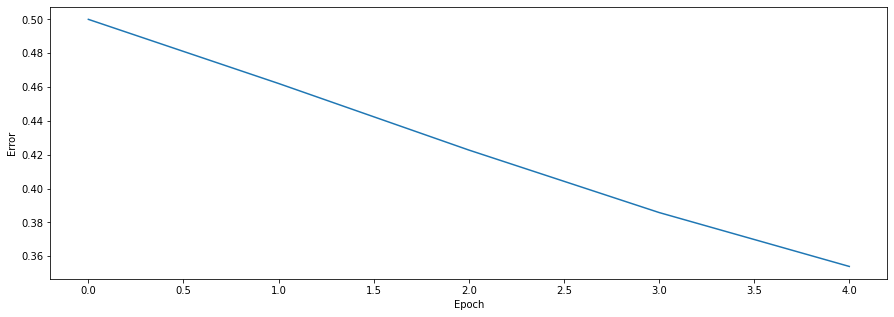

In [28]:
# ploting the error over entire training duration
plt.figure(figsize=(15,5))
plt.plot(mymodel.epoch_list, mymodel.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# SECTION 3

In [29]:
# train neural network for 50000 epochs
mymodel.train(50000,'yes')

In [30]:
# print the predictions for both examples                                   
print(f'{mymodel.predict(example)} - Correct: {example[0][0]}')
print(f'{mymodel.predict(example_2)} - Correct: {example_2[0][0]}')

[[0.99986442]] - Correct: 1
[[0.15431281]] - Correct: 0


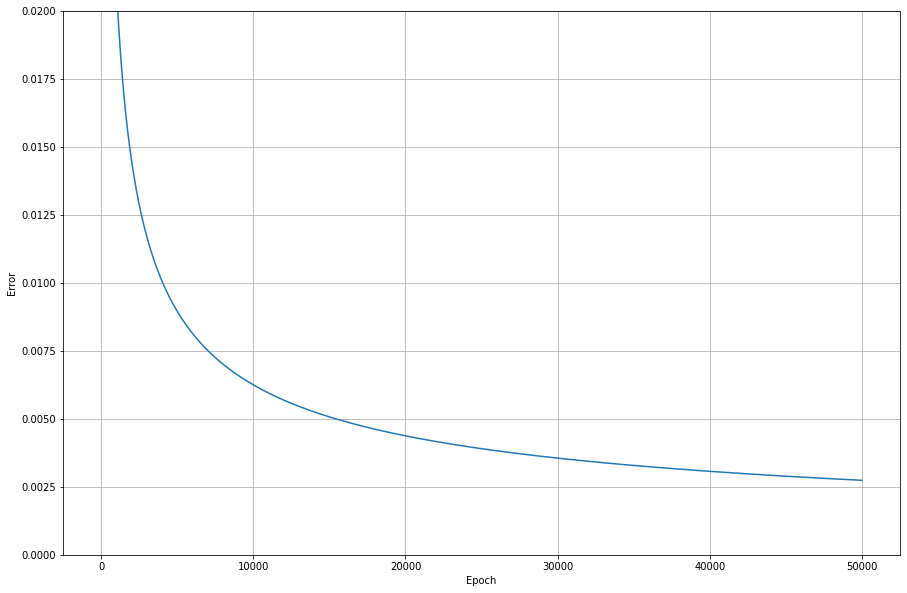

In [31]:
# plot the error over the entire training duration
plt.figure(figsize=(15,10))
plt.plot(mymodel.epoch_list, mymodel.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0,0.02])
plt.grid(b=True)
plt.show()

 Above observation states that the sigmoid activation function was able acheive 99% accuracy at 5000 epochs because the error flattening tends to initiate evidently from the mark of 5000 

# SECTION 4

In [32]:
# train neural network using softmax activation function for 500 epochs
mymodel.train_softmax(500)

In [33]:
# print the predictions using softmax activation function for both examples
print(f'{mymodel.predict_softmax(example)} - Correct: {example[0][0]}')
print(f'{mymodel.predict_softmax(example_2)} - Correct: {example_2[0][0]}')

[[1.]] - Correct: 1
[[1.]] - Correct: 0


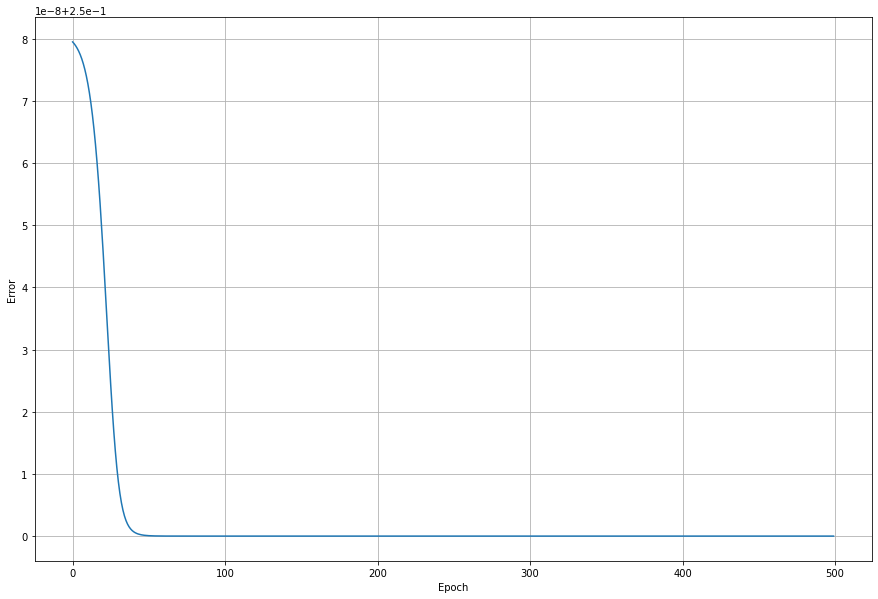

In [34]:
# plot the error over the entire training duration
plt.figure(figsize=(15,10))
plt.plot(mymodel.epoch_list,mymodel.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid(b=True)
plt.show()

After 40 epochs using softmax function our model achieved 99% accuracy.